In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt

def getData(path):
    file1 = open(path,"r")
    line = "start"
    x = []
    y = []
    while 1: 
        line = file1.readline()
        if not line:
            break
        line = line.replace('\t',' ')
        line = line.replace('\n','')
        line = line.split(" ")
        x.append([1]+[float(j) for j in line[1:len(line) -1] ])# 1 for x0
        y.append(int(line[-1]))
    file1.close()
    x = np.array(x)
    y = np.array(y)
    return x, y


'''
Implement the fixed learning rate gradient descent algorithm for logistic regression. 
Run the algorithm with η=0.001 and T = 2000. 
What is Eout(g) from your algorithm, evaluated using the 0/1 error on the test set?
'''
def sigmoid(s):
    return 1/(1 + np.exp(-s))
def sign(num):
    if num>= 0:
        return 1
    else:
        return -1

def logistic(T, n, w0, x, y):
    w = w0.copy()
    w_record = []
    for i in range(T):
        w = w + n * gradient(w, x, y)
        w_record.append(w)
    return w_record

def gradient(w ,x, y):
    N = len(y)
    err = np.array([0]*len(w))
    for n in range(N):
        err = err + sigmoid(-1 * y[n] * w.dot(x[n]))*(y[n]*x[n])
    return err/N

In [2]:
train_x, train_y = getData('hw3_train')
test_x, test_y = getData("hw3_test")
def errorRate(w, testx, testy):
    wrong = 0
    for i in range(len(testx)):
        if sign(w.dot(testx[i])) != testy[i]:
            wrong += 1
    return wrong/len(testx)

In [3]:
def logisticSGD(T, n, w0, x, y):
    w = w0.copy()
    w_record = []
    for i in range(T):
        err = np.array([0]*len(w))
        err = err + sigmoid(-1 * y[i%len(x)] * w.dot(x[i%len(x)]))*(y[i%len(x)]*x[i%len(x)])
        w = w + n * err
        #print(w)
        w_record.append(w)
    return w_record

In [4]:
T = 2000
n = 0.001
w0 = np.array([0]*len(train_x[0]))
w_0001_GD = logistic(T, n, w0, train_x, train_y)
w_0001_SGD = logisticSGD(T, n, w0, train_x, train_y)
print("eta = 0.001")
print("=====GD=====")
print("Ein =",errorRate(w_0001_GD[-1], train_x, train_y))
print("Eout =",errorRate(w_0001_GD[-1], test_x, test_y))
print("=====SGD=====")
print("Ein =",errorRate(w_0001_SGD[-1], train_x, train_y))
print("Eout =",errorRate(w_0001_SGD[-1], test_x, test_y))

eta = 0.001
=====GD=====
Ein = 0.466
Eout = 0.475
=====SGD=====
Ein = 0.464
Eout = 0.473


In [5]:
T = 2000
n = 0.01
w0 = np.array([0]*len(train_x[0]))
w_001_GD = logistic(T, n, w0, train_x, train_y)
w_001_SGD = logisticSGD(T, n, w0, train_x, train_y)
print("eta = 0.01")
print("=====GD=====")
print("Ein =",errorRate(w_001_GD[-1], train_x, train_y))
print("Eout =",errorRate(w_001_GD[-1], test_x, test_y))
print("=====SGD=====")
print("Ein =",errorRate(w_001_SGD[-1], train_x, train_y))
print("Eout =",errorRate(w_001_SGD[-1], test_x, test_y))

eta = 0.01
=====GD=====
Ein = 0.197
Eout = 0.22
=====SGD=====
Ein = 0.187
Eout = 0.20533333333333334


In [6]:
Ein_0001_GD = []
Ein_0001_SGD = []
for w in w_0001_GD:
    Ein_0001_GD.append(errorRate(w, test_x, test_y))
for w in w_0001_SGD:
    Ein_0001_SGD.append(errorRate(w, test_x, test_y))

In [7]:
Ein_001_GD = []
Ein_001_SGD = []
for w in w_001_GD:
    Ein_001_GD.append(errorRate(w, test_x, test_y))
for w in w_001_SGD:
    Ein_001_SGD.append(errorRate(w, test_x, test_y))

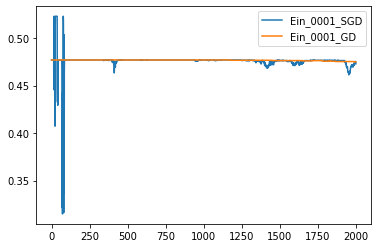

In [17]:
x = [i for i in range(2000)]
plt.plot(x, Ein_0001_SGD, '-', label='Ein_0001_SGD', markersize=1)
plt.plot(x, Ein_0001_GD, '-', label='Ein_0001_GD', markersize=1)
plt.legend()
plt.savefig('eta0001.png')
plt.show()

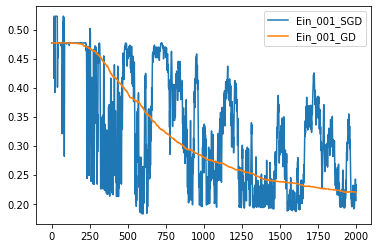

In [16]:
x = [i for i in range(2000)]
plt.plot(x, Ein_001_SGD, '-', label='Ein_001_SGD', markersize=1)
plt.plot(x, Ein_001_GD, '-', label='Ein_001_GD', markersize=1)
plt.legend()
plt.savefig('eta001.png')
plt.show()

In [22]:
for i in range(1,100):
    print(i, Ein_001_SGD[-i])

1 0.20533333333333334
2 0.21966666666666668
3 0.23366666666666666
4 0.21966666666666668
5 0.24233333333333335
6 0.236
7 0.222
8 0.21433333333333332
9 0.23033333333333333
10 0.21033333333333334
11 0.19833333333333333
12 0.19266666666666668
13 0.19433333333333333
14 0.19433333333333333
15 0.207
16 0.191
17 0.19433333333333333
18 0.19833333333333333
19 0.213
20 0.23166666666666666
21 0.20666666666666667
22 0.199
23 0.2
24 0.19833333333333333
25 0.19566666666666666
26 0.198
27 0.20033333333333334
28 0.19766666666666666
29 0.19466666666666665
30 0.197
31 0.19966666666666666
32 0.20666666666666667
33 0.21766666666666667
34 0.20833333333333334
35 0.22
36 0.23366666666666666
37 0.249
38 0.2776666666666667
39 0.2916666666666667
40 0.31033333333333335
41 0.2946666666666667
42 0.315
43 0.33366666666666667
44 0.32566666666666666
45 0.30366666666666664
46 0.32066666666666666
47 0.339
48 0.3546666666666667
49 0.3393333333333333
50 0.32666666666666666
51 0.34
52 0.3283333333333333
53 0.34533333333333